# 샘플 사운드를 이용하여 스펙트럼 이미지 생성

In [1]:
# pip install librosa == 0.10.0
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [2]:
# 음성파일을 불러와 봅시다.
filename = './blues.00001.wav'
y, sr = librosa.load(filename)

In [3]:
# 불러온 음성파일을 전처리 해봅시다.
# 스펙트로그램 생성을 위해 짧은 오디오 클립을 추출합니다.
duration = 10  # 추출할 클립의 길이는 10초입니다.
samples = int(duration * sr)  # 추출할 샘플 수를 지정합니다.
start = 0  # 추출 시작 지점은 0초부터 시작합니다.
y = y[start : start + samples]

In [4]:
# 스펙트로그램을 생성합니다.
spec = librosa.stft(y)
spec_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
librosa.display.specshow(spec_db, sr=sr, y_axis='log', x_axis='time')
plt.title('Log-frequency power spectrogram')
# 스펙토그램을 이미지 파일로 저장합시다.
plt.savefig('spectrogram.png')
plt.close()

# MFCC(Mel-Frequency Cepstral Coefficient)

In [5]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [6]:
filename = './blues.00001.wav'
y, sr = librosa.load(filename, sr=44100)  # 샘플링 주파수는 44.1kHz고 CD품질의 음원에서 많이 사용되며 1초 동안 소리신호를 44,100개 추출합니다.

print('Sampling rate:', sr)

Sampling rate: 44100


In [7]:
hop_length = 512
n_fft = 2048
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)  # 오디오 파일의 단기 푸리에 변환을 계산하고 이를 절대값으로 변환합니다.

In [8]:
n_mels=40  # Mel 필터의 개수는 40개 입니다. 이 값이 작을 수록 주파수 대역은 상세하게 분석할 수 있습니다. 이 값이 클 수록 높은 주파수 대역을 상세하게 분석할 수 있습니다.
mel_spec=librosa.feature.melspectrogram(S=librosa.power_to_db(np.abs(stft)**2), sr=sr, n_mels=n_mels)  # 멜 스케일 필터 방정식을 이용하여 멜 스펙트로그램을 계산합시다.

In [9]:
n_mfcc = 13  # MFCC를 추출할 때 사용하는 파라미터로써, 특징 벡터의 개수입니다.
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(mel_spec), n_mfcc=n_mfcc)  # 멜 스펙트로그램에서 MFCC를 계산합시다.

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.title('MFCC')
plt.tight_layout()
plt.savefig('MFCC.png', dpi=300, bbox_inches='tight')  # dpi는 숫자가 클 수록 고해상도라고 보면 됩니다.
plt.close()

# 데이터 증강 기법(Data Augmentation)

### 1. White noise를 추가하여 오디오 신호 특성 변경

In [11]:
# pip install soundfile
import numpy as np
import soundfile as sf
import IPython.display as ipd

In [12]:
file_path = './blues.00001.wav'  # WAV 파일은 고해상도 및 대용량 오디오 파일을 저장하기 위한 확장자 입니다.
data, sr = sf.read(file_path)

In [13]:
noise_amp = 0.5 * np.random.uniform() * np.amax(data)  # 노이즈의 크기는 이 코드에서 조절합니다.
noise = noise_amp * np.random.normal(size=data.shape)  # 노이즈를 생성해 봅시다.

In [14]:
data_noise = data.astype('float32') + noise.astype('float32')  # 생성된 노이즈를 오디오 파일에 추가하여 봅시다.

In [15]:
save_path = './sample_noise_added.wav'  # 노이즈가 추가된 오디오를 작업 디렉토리에 저장하여 봅시다.
sf.write(save_path, data_noise, sr)

In [16]:
# 저장한 오디오 파일을 불러와 봅시다.
sample_wav = "./sample_noise_added.wav"
sample_data, sample_sr = sf.read(sample_wav)
ipd.Audio(sample_data, rate=sample_sr)

원본 음성파일의 파형과 노이즈가 추가된 음성파일의 파형을 그려보고 비교하기

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

In [18]:
file_path = './blues.00001.wav'
data, sr = sf.read(file_path)

In [19]:
noise_amp = 0.5 * np.random.uniform() * np.amax(data)
noise = noise_amp * np.random.normal(size=data.shape)
data_noise = data.astype('float32') + noise.astype('float32')

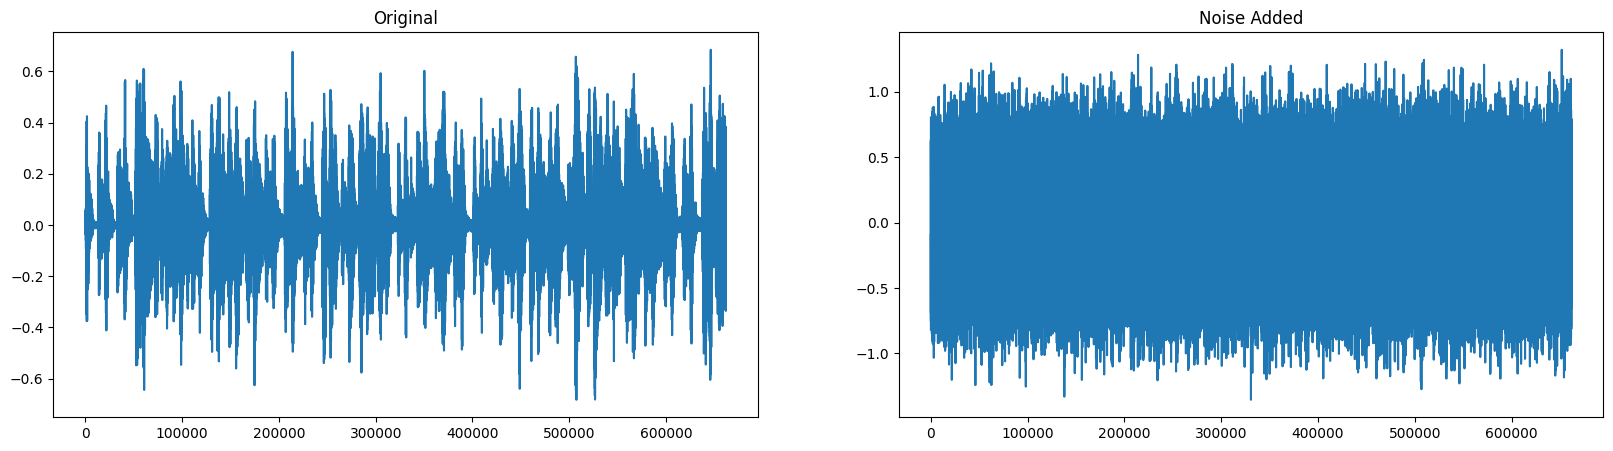

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(data)
plt.title('Original')

plt.subplot(1,2,2)
plt.plot(data_noise)
plt.title('Noise Added')

plt.show()

### 2. Stretching으로 재생시간 늘리기

In [21]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import soundfile as sf

In [22]:
data, sr = librosa.load('./blues.00001.wav')
data_stretch = librosa.effects.time_stretch(data, rate=0.8)  # 오디오 신호를 80% 만큼 늘려봅시다.

In [23]:
save_path = './sample_stretch.wav'  # 재생시간이 늘어난 결과물을 오디오 파일로 저장해봅시다.
sf.write(save_path, data_stretch, sr)

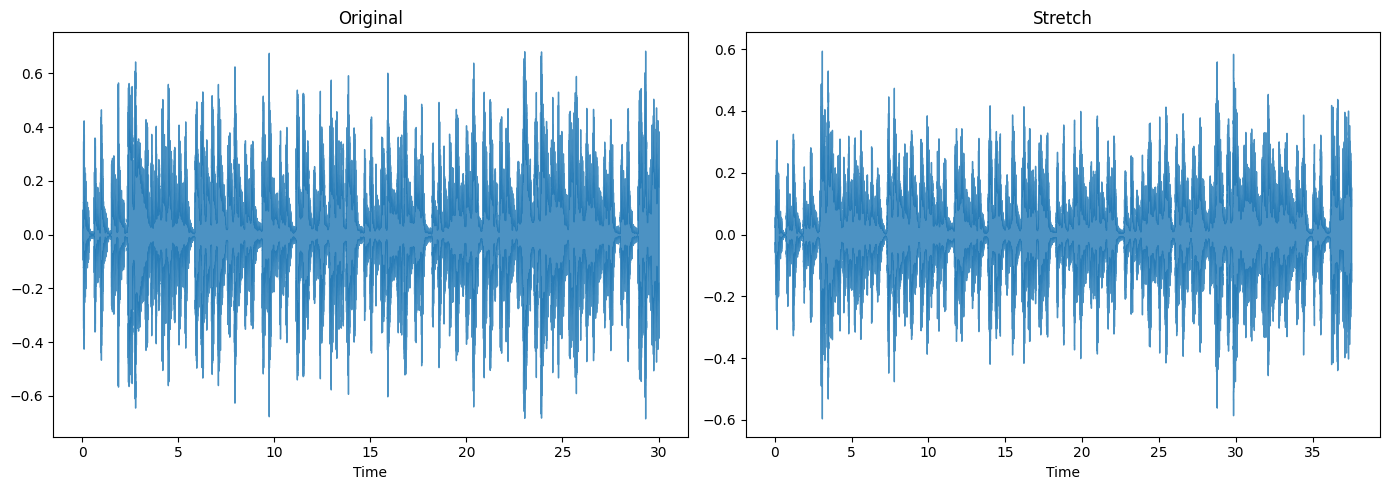

In [24]:
# 원본 음성 데이터와 재생시간을 늘린 데이터를 파형을 통해 비교해봅시다.
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
librosa.display.waveshow(data, sr=sr, alpha=0.8)
plt.title('Original')

plt.subplot(1, 2, 2)
librosa.display.waveshow(data_stretch, sr=sr, alpha=0.8)
plt.title('Stretch')

plt.tight_layout()  # 이미지를 둘러싸는 빈공간을 잘라냅니다.
plt.show()

# GTZAN Dataset(MGR을 위한 공개 데이터 세트)

## 1. 샘플 음성 데이터를 Waveshow로 시각화하고 Augmentation을 적용해봅시다.

In [25]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import glob
import numpy as np
import IPython
import random

In [26]:
audio = './blues.00001.wav'
data, sr = librosa.load(audio)  # 불러온 오디로 파일을 시계열 데이터로 불러옵니다.
librosa.load(audio, sr=22050)  # 샘플링 주파수는 22kHz이고 1초 동안 소리신호를 22,050개 추출합니다.

(array([ 0.00341797,  0.00430298,  0.00137329, ..., -0.11953735,
        -0.17495728, -0.15118408], dtype=float32),
 22050)

In [27]:
IPython.display.Audio(data, rate=sr)

### 음성 데이터를 Waveshow로 변환하여 시각화

In [28]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, color='purple')
plt.axis('off')
plt.savefig(f'./waveshow_original.png', bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~10초 구간만 Waveshow로 변환하여 파형 추출

In [29]:
start_time=0
end_time=10

start_sample=sr * start_time
end_sample=sr * end_time

data_section=data[start_sample : end_sample]

In [30]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data_section, color='purple')
plt.axis('off')
plt.savefig(f'./waveshow_0-10.png', bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~10초 구간 파형에 Augmentation: noise를 추가하여 이미지 저장

In [31]:
noise = 0.05 * np.random.randn( * data_section.shape)
data_augmented = data_section + noise

In [32]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data_augmented, color='purple')
plt.axis('off')
plt.savefig(f'./waveshow_0-10_aug_noise.png', bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~ 10초 구간 파형에 Augmentation: Stretching을 추가하여 이미지 저장

In [33]:
data_stretch = librosa.effects.time_stretch(data_section, rate=0.8)

In [34]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data_stretch, color='purple')
plt.axis('off')
plt.savefig(f'./waveshow_0-10_aug_stretch.png', bbox_inches='tight', pad_inches=0)
plt.close()

## 2. 샘플 음성 데이터를 STFT로 계산하고 Augmentation을 적용해봅시다.

In [35]:
stft = librosa.stft(data)  # 음성 데이터를 stft로 계산합시다.
stft_db = librosa.amplitude_to_db(abs(stft))  # stft를 계산한 절대값 결과를 db로 변환합시다.

In [36]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.savefig(f'./STFT_original.png', bbox_inches='tight', pad_inches=0)  # 계산된 stft를 이미로 저장해봅시다.
plt.close()

### 음성 데이터의 0~10초 구간 파형을 추출하여 이미지로 저장

In [37]:
start_time = 0
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time
data_section_stft = data[start_sample : end_sample]

In [38]:
stft = librosa.stft(data_section_stft)
stft_db = librosa.amplitude_to_db(abs(stft))

In [39]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./STFT_0-10.png", bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~10초 구간 파형에 Augmentation: noise를 추가하여 이미지 저장

In [40]:
noise = 0.005 * np.random.randn(*data_section_stft.shape)
augmented_data_section = data_section_stft + noise

In [41]:
augment_stft = librosa.stft(augmented_data_section)
augmented_stft_db = librosa.amplitude_to_db(abs(augment_stft))

In [42]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(augmented_stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig(f'./STFT_0-10_aug_noise.png', bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~10초 구간 파형에 Augmentation: Stretching을 추가하여 이미지 저장

In [43]:
rate = 0.8 + np.random.random() * 0.4
stretched_data_section = librosa.effects.time_stretch(data_section_stft, rate=rate)

In [44]:
stretched_stft = librosa.stft(stretched_data_section)
stretched_stft_db = librosa.amplitude_to_db(abs(stretched_stft))

In [45]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(stretched_stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig(f'./STFT_0-10_aug_stretch.png', bbox_inches='tight', pad_inches=0)
plt.close()

## 3. 샘플 음성 데이터를 mel-spec으로 계산하고 Augmentation을 적용해봅시다.

In [46]:
stft = librosa.stft(data)
mel_spec = librosa.feature.melspectrogram(S=abs(stft))
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

In [47]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.savefig(f'./mel_spec_original.png', bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~10초 구간 파형을 mel-spec로 계산하여 이미지 저장

In [48]:
start_time = 0
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time
data_section_stft = data[start_sample : end_sample]

In [49]:
stft_temp = librosa.stft(data_section_stft)

In [50]:
mel_spec = librosa.feature.melspectrogram(S=abs(stft_temp))
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

In [51]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.savefig(f'./mel_spec_0-10.png', bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~10초 구간 파형을 mel-spec로 계산하고 Augmentation: noise를 추가하여 이미지 저장

In [52]:
stft = librosa.stft(data_section_stft)
mel_spec = librosa.feature.melspectrogram(S=abs(stft))
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

In [53]:
noise = 0.005 * np.random.randn(*mel_spec_db.shape)
augmented_spec = mel_spec_db + noise
augmented_spec_db = librosa.amplitude_to_db(augmented_spec, ref=np.max)

In [54]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(augmented_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.savefig(f'./mel_spec_0-10_aug_noise.png', bbox_inches='tight', pad_inches=0)
plt.close()

### 음성 데이터의 0~10초 구간 파형을 mel-spec로 계산하고 Augmentation: Stretching을 추가하여 이미지 저장

In [55]:
rate = np.random.uniform(low=0.8, high=1.2)  # 0.8 ~ 1.2 사이의 랜덤한 비율로 시간을 늘립니다.
stretched = librosa.effects.time_stretch(data, rate=rate)

In [56]:
stft_stretched = librosa.stft(stretched)
mel_spec_stretched = librosa.feature.melspectrogram(S=abs(stft_stretched))
mel_spec_stretched_db = librosa.amplitude_to_db(mel_spec_stretched, ref=np.max)

In [57]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_stretched_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.savefig(f'./mel_spec_0-10_aug_stretch.png', bbox_inches='tight', pad_inches=0)
plt.close()

# GTZAN Dataset image 프로세싱

## 비율 유지하고 리사이즈 작업 진행

In [58]:
from PIL import Image
import os
import glob

In [59]:
def expend2square(pil_img, background_color) :
    width, height = pil_img.size
    
    if width == height :
        return pil_img
    
    elif width > height :
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else :
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result
    
def resize_with_padding(pil_img, new_size, background_color) :
    img = expend2square(pil_img, background_color)
    img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)
    
    return img

img_path_list = glob.glob(os.path.join("./", "*.png"))

for i, image_path in enumerate(img_path_list) :
    img = Image.open(image_path)
    img_new = resize_with_padding(img, (255,255), (0,0,0))
    
    save_file_name = f"./{str(i).zfill(4)}_resize_img.png"
    img_new.save(save_file_name, "png")

C:\Users\bomi\AppData\Local\Temp\ipykernel_15704\3898634501.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)
